In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder_path = "/content/drive/MyDrive/MY_울릉도_프로젝트/교통단속"

# 위반 법조항

In [ ]:
import pandas as pd
import glob
import re
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns

years = range(2019, 2026)
file_names = [f"{str(y)[2:]}년 교통단속.csv" for y in years]


In [ ]:
df_list = []

for y, file in zip(years, file_names):
    file_path = os.path.join(folder_path, file)

    if os.path.exists(file_path):
        print(f"{file} 불러오는 중...")
        temp = pd.read_csv(file_path, encoding="utf-8")
        temp["연도"] = y
        df_list.append(temp)
    else:
        print(f"파일 없음: {file}")


✔ 19년 교통단속.csv 불러오는 중...
✔ 20년 교통단속.csv 불러오는 중...
✔ 21년 교통단속.csv 불러오는 중...
✔ 22년 교통단속.csv 불러오는 중...
✔ 23년 교통단속.csv 불러오는 중...
✔ 24년 교통단속.csv 불러오는 중...
✔ 25년 교통단속.csv 불러오는 중...


In [ ]:
df = pd.concat(df_list, ignore_index=True)

print("\n데이터 열 확인:", df.columns.tolist())
print("데이터 수:", len(df))


데이터 열 확인: ['위반일시', '위반법조항', '위반장소', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', '연도']
데이터 수: 333


In [ ]:
def normalize_law_with_hang(x):
    x = str(x).replace(" ", "")
    # 조 + 항 단위까지 추출
    match = re.search(r'(제\d+조(?:제\d+항)?)', x)
    if match:
        return match.group(1)
    else:
        return x

df['법조항_정규화'] = df['위반법조항'].apply(normalize_law_with_hang)


In [ ]:
law_counts = df["위반법조항"].value_counts().head(20)
print(law_counts)

위반법조항
제50조3항       65
제54조1항       41
제48조제1항      39
제73조2항       17
제17조3항        7
제50조1항        7
제25조          4
제49조1항10호     4
제5조           4
제22조3항        3
제13조3항        2
제25조2항        2
제27조1항        1
제32조          1
제25조1항        1
제37조          1
Name: count, dtype: int64


In [ ]:
law_by_year = df.groupby(["연도", "위반법조항"]).size().reset_index(name="건수")
law_by_year.head()

,연도,위반법조항,건수
0,2019,제22조3항,2
1,2019,제25조,3
2,2019,제48조제1항,6
3,2019,제54조1항,3
4,2019,제73조2항,2


In [ ]:
law_ratio = df["위반법조항"].value_counts(normalize=True) * 100
print(law_ratio)

위반법조항
제50조3항       32.663317
제54조1항       20.603015
제48조제1항      19.597990
제73조2항        8.542714
제17조3항        3.517588
제50조1항        3.517588
제25조          2.010050
제49조1항10호     2.010050
제5조           2.010050
제22조3항        1.507538
제13조3항        1.005025
제25조2항        1.005025
제27조1항        0.502513
제32조          0.502513
제25조1항        0.502513
제37조          0.502513
Name: proportion, dtype: float64


In [ ]:
df['위반일시'] = df['위반일시'].astype(str).str.replace(r'\.0$', '', regex=True)
df['위반일시'] = pd.to_datetime(df['위반일시'], format='%Y%m%d%H%M')

# 날짜, 연도, 월, 요일, 시 추가
df['날짜'] = df['위반일시'].dt.date
df['연도'] = df['위반일시'].dt.year
df['월'] = df['위반일시'].dt.month
df['요일'] = df['위반일시'].dt.day_name()
df['시'] = df['위반일시'].dt.hour

In [ ]:
# 위반법조항 공백 제거
df['위반법조항'] = df['위반법조항'].astype(str).str.strip()

In [ ]:
print(df[['위반일시','날짜','위반법조항']].head())


                 위반일시          날짜    위반법조항
0 2018-12-20 09:15:00  2018-12-20  제48조제1항
1 2019-05-02 14:26:00  2019-05-02   제22조3항
2 2019-05-19 18:30:00  2019-05-19  제48조제1항
3 2019-05-28 10:28:00  2019-05-28   제54조1항
4 2019-06-22 14:36:00  2019-06-22   제22조3항


In [ ]:
# 월 컬럼 생성
df['월'] = df['위반일시'].dt.month

# 월별 × 법조항별 건수 집계
monthly_law_counts = df.groupby(['월','위반법조항']).size().unstack(fill_value=0)

print(monthly_law_counts)

위반법조항  제13조3항  제17조3항  제25조2항  제48조제1항  제54조1항  제25조1항  제73조2항  제50조3항  \
월                                                                        
1.0         1       3       1        1       2       0       0       0   
2.0         0       0       0        0       1       1       6       0   
3.0         0       1       0        4       5       0       2       0   
4.0         0       2       0        4       3       0       1       2   
5.0         0       0       0        6       4       0       0      15   
6.0         0       1       0        6       4       0       0       8   
7.0         0       0       0        6       3       0       0       3   
8.0         1       0       0        4       6       0       3       1   
9.0         0       0       0        4       3       0       1       9   
10.0        0       0       0        2       3       0       1      23   
11.0        0       0       0        1       3       0       3       2   
12.0        0       0       1        1

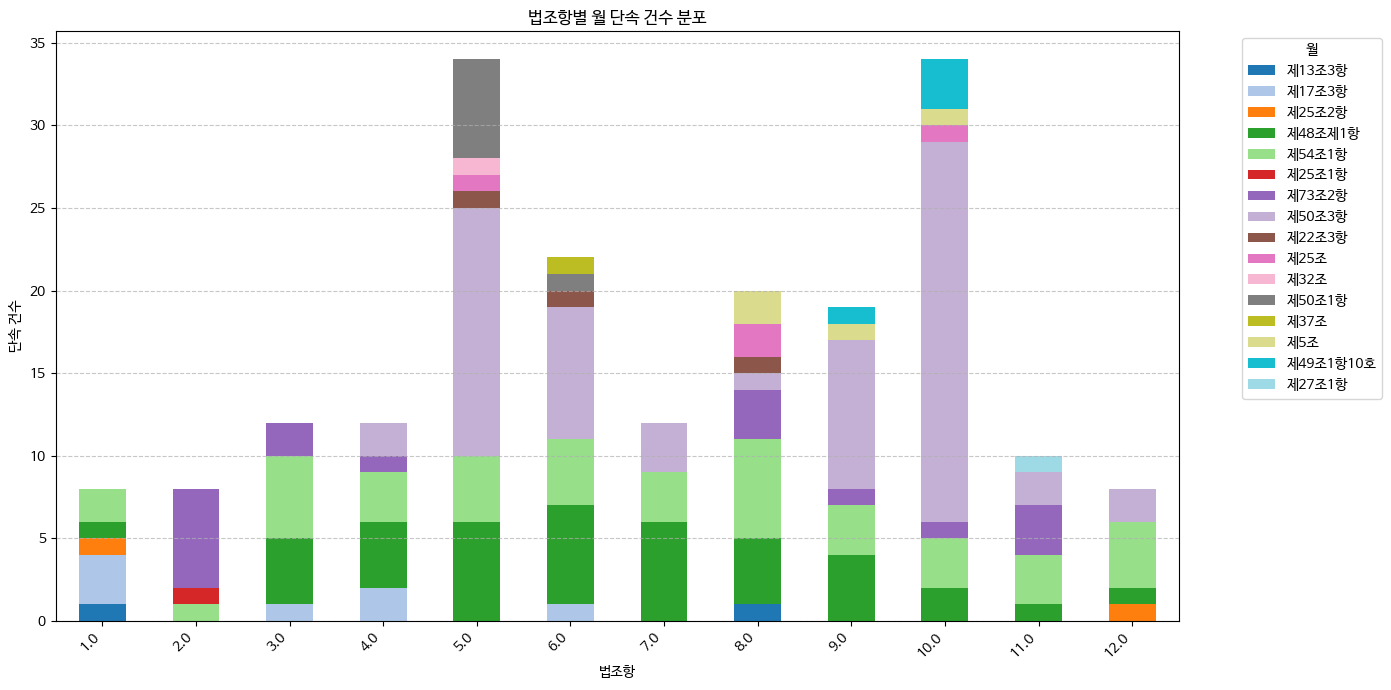

In [ ]:

# 색상 팔레트
colors = plt.get_cmap('tab20').colors

# 법조항별 월 단속 건수 막대그래프
monthly_law_counts.plot(kind='bar', figsize=(14,7), stacked=True, colormap='tab20')

plt.title("법조항별 월 단속 건수 분포")
plt.xlabel("법조항")
plt.ylabel("단속 건수")
plt.xticks(rotation=45, ha='right')
plt.legend(title="월", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
# 각 월별 Top 1 법조항
top_law_per_month = monthly_law_counts.idxmax(axis=1)
top_count_per_month = monthly_law_counts.max(axis=1)

# 결과 테이블 생성
monthly_top = pd.DataFrame({
    '가장 많이 위반된 법조항': top_law_per_month,
    '단속 건수': top_count_per_month
})

print(monthly_top)


     가장 많이 위반된 법조항  단속 건수
월                        
1.0         제17조3항      3
2.0         제73조2항      6
3.0         제54조1항      5
4.0        제48조제1항      4
5.0         제50조3항     15
6.0         제50조3항      8
7.0        제48조제1항      6
8.0         제54조1항      6
9.0         제50조3항      9
10.0        제50조3항     23
11.0        제54조1항      3
12.0        제54조1항      4


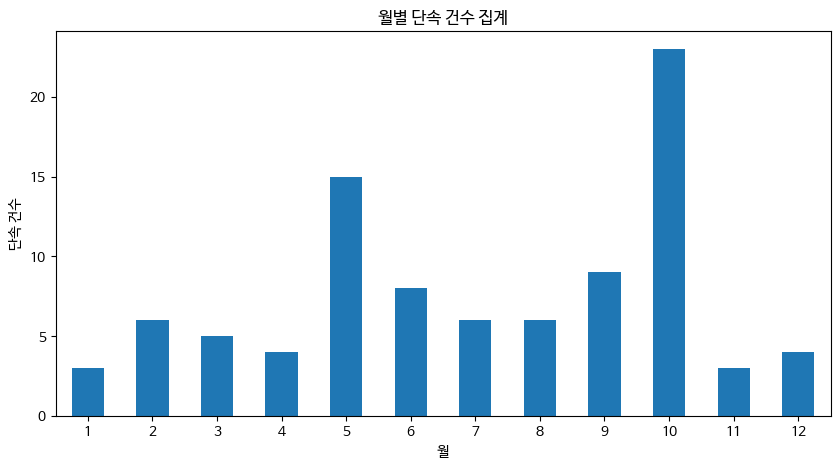

In [ ]:
#월별 단속 건수 집계 출력
monthly_top['단속 건수'].plot(kind='bar', figsize=(10,5))
plt.title("월별 단속 건수 집계")
plt.xlabel("월")
plt.ylabel("단속 건수")
plt.xticks(ticks=range(len(monthly_top.index)), labels=[int(x) for x in monthly_top.index], rotation=0)
plt.show()

In [ ]:
# 법조항별 전체 건수 계산 → Top 4 선택
top4_laws = df['위반법조항'].value_counts().head(5).index.tolist()

# Top 4 법조항만 필터링
df_top4 = df[df['위반법조항'].isin(top4_laws)]

# 월별 × 법조항별 단속 건수 집계
monthly_top4_counts = df_top4.groupby(['월','위반법조항']).size().unstack(fill_value=0)

# 숫자 테이블 확인
print(monthly_top4_counts)

위반법조항  제48조제1항  제54조1항  제73조2항  제50조3항
월                                     
1.0          1       2       0       0
2.0          0       1       6       0
3.0          4       5       2       0
4.0          4       3       1       2
5.0          6       4       0      15
6.0          6       4       0       8
7.0          6       3       0       3
8.0          4       6       3       1
9.0          4       3       1       9
10.0         2       3       1      23
11.0         1       3       3       2
12.0         1       4       0       2


<Figure size 1200x600 with 0 Axes>

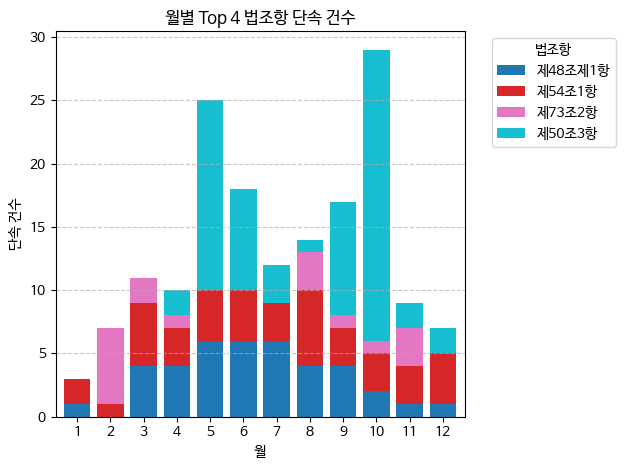

In [ ]:

# 월 컬럼 생성
df['월'] = df['위반일시'].dt.month

# 법조항별 전체 건수 계산 → Top 4 선택
top4_laws = df['위반법조항'].value_counts().head(5).index.tolist()

#  Top 4 법조항만 필터링
df_top4 = df[df['위반법조항'].isin(top4_laws)]

# 월별 × 법조항별 단속 건수 집계
monthly_top4_counts = df_top4.groupby(['월','위반법조항']).size().unstack(fill_value=0)

# 그래프 그리기
plt.figure(figsize=(12,6))
monthly_top4_counts.plot(kind='bar', stacked=True, colormap='tab10', width=0.8)

plt.title("월별 Top 4 법조항 단속 건수")
plt.xlabel("월")
plt.ylabel("단속 건수")
# X축을 정수로 표시하도록 수정
plt.xticks(ticks=range(len(monthly_top4_counts.index)), labels=[int(x) for x in monthly_top4_counts.index], rotation=0)
plt.legend(title="법조항", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

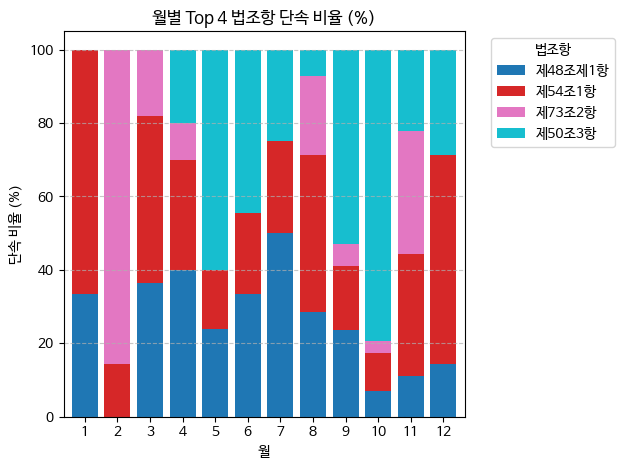

In [ ]:

# 월 컬럼 생성
df['월'] = df['위반일시'].dt.month

# 법조항별 전체 건수 계산 → Top 4 선택
top4_laws = df['위반법조항'].value_counts().head(5).index.tolist()

# Top 4 법조항만 필터링
df_top4 = df[df['위반법조항'].isin(top4_laws)]

# 월별 × 법조항별 단속 건수 집계
monthly_top4_counts = df_top4.groupby(['월','위반법조항']).size().unstack(fill_value=0)

#  퍼센트 계산 (각 월별 합계 대비)
monthly_top4_percent = monthly_top4_counts.div(monthly_top4_counts.sum(axis=1), axis=0) * 100

#  그래프 그리기
plt.figure(figsize=(12,6))
monthly_top4_percent.plot(kind='bar', stacked=True, colormap='tab10', width=0.8)

plt.title("월별 Top 4 법조항 단속 비율 (%)")
plt.xlabel("월")
plt.ylabel("단속 비율 (%)")
plt.xticks(ticks=range(len(monthly_top4_percent.index)), labels=[int(x) for x in monthly_top4_percent.index], rotation=0)
plt.legend(title="법조항", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
